#### Name: Kefan Zheng
#### StudentId: 9086175008
#### Email: kzheng58@wisc.edu

# Problem 3.1

## (a)  
**Step Size Strategy**  
I used a linearly decaying step strategy. At the beginning of training, the step size is set to 0.1, so that the parameters are possible to escape from the local optimal point and can approach the optimal solution quickly. As the training progresses, the step size is gradually reduced, allowing the parameters to be adjusted more finely until convergence. Such a strategy can improve the speed of model convergence.  
**Data Set**  
80% of the data set is split into training set and 20% is split into test set.  
What's more, the original value of the dataset is big and can cause overflow errors, so I standardize the feature matrix $X$ by the method $X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)$  
**Model Structure**  
Add a bias term to the model, so the $\theta$ has 7 parameters.

In [1]:
import numpy as np
import pandas as pd

def loadDataSet():
    # read data from file
    df = pd.read_csv('titanic_data.csv')
    # split features and label
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    # transform to numpy
    X = X.to_numpy().T
    y = y.to_numpy().reshape((y.shape[0], 1))
    # standardize
    standardize_mean = np.mean(X, axis=1, keepdims=True)
    standardize_std = np.std(X, axis=1, keepdims=True)
    X = (X - standardize_mean) / standardize_std 
    # add bias term
    ones_row = np.ones((1, X.shape[1]))
    X = np.vstack((ones_row, X))
    # split train and test
    sample_number = X.shape[1]
    train_number = int(sample_number * 0.8)
    X_test = X[:, train_number:]
    X_train = X[:, :train_number]
    y_test = y[train_number:]
    y_train = y[:train_number]
    return X, X_train, X_test, y, y_train, y_test, standardize_mean, standardize_std

# load data
X, X_train, X_test, y, y_train, y_test, standardize_mean, standardize_std = loadDataSet()

## (b)
It takes my computer (MacBook Air - Apple M1 - 8GB Memory) 264 iterations to converge, which costs less than 1 second. And the accuracy on test set is $0.82$.

In [2]:
# logistic function
def logisticFun(x):
    x[x < -500] = -500
    return 1 / (1 + np.exp(-x))

def computeGradient(X, y, theta):
    # compute gradient
    gradient = X @ (y.T - logisticFun(theta.T @ X)).T
    return gradient

def learningTheta(X_train, X_test, y_train, y_test):
    theta = np.ones(X_train.shape[0]).reshape((X_train.shape[0],1))
    # learning rate
    step = 0.1
    # learning rate's decay rate
    decay_rate = 0.0001
    # convergence condition
    epsilon = 0.0001
    # max iterations
    max_iterations = 10000
    for i in range(max_iterations):
        # print('Iteration', i)
        gradient = computeGradient(X_train, y_train, theta)
        theta = theta + step * gradient
        # print('gradient: ', gradient)
        # print('theta: ', theta)
        if np.linalg.norm(gradient) < epsilon:
            print('Model converge at iteration', i)
            test_result = logisticFun(theta.T @ X_test).reshape((y_test.shape[0], 1))
            test_result[test_result > 0.5] = 1
            test_result[test_result <= 0.5] = 0
            test_accuracy = np.sum(test_result == y_test) / y_test.shape[0]
            print("Test Accuracy: ", test_accuracy)
            break

        step = step / (1 + decay_rate * i)
    
    return theta

# learning theta
theta = learningTheta(X_train, X_test, y_train, y_test)
print('theta: ')
print(theta)

Model converge at iteration 264
Test Accuracy:  0.8202247191011236
theta: 
[[-0.61084792]
 [-0.96140473]
 [ 1.30266843]
 [-0.54208691]
 [-0.37658057]
 [-0.14286745]
 [ 0.06158078]]


## (c)
$$
\hat{\theta} = \begin{bmatrix} -0.61084792 \\ -0.96140473 \\ 1.30266843 \\ -0.54208691 \\ -0.37658057 \\ -0.14286745 \\ 0.06158078 \end{bmatrix}
$$  

In [3]:
print('theta: ')
print(theta)

theta: 
[[-0.61084792]
 [-0.96140473]
 [ 1.30266843]
 [-0.54208691]
 [-0.37658057]
 [-0.14286745]
 [ 0.06158078]]


## (d)
$$
\ell(\hat{\theta}) = 
\sum_{i=1}^{N} \left[ y_i \log \left( \frac{1}{1 + e^{-\theta^T x_i}} \right) + (1 - y_i) \log \left( \frac{1}{1 + e^{\theta^T x_i}} \right) \right] = 
-391.33756988
$$

In [4]:
def computeLogLikelihood(X, y, theta):
    log_likelihood =  np.log(logisticFun(theta.T @ X)) @ y + np.log(logisticFun(-theta.T @ X)) @ (1 - y)
    return log_likelihood

# compute log likelihood
log_likelihood = computeLogLikelihood(X, y, theta)
print('log_likelihood:\n', log_likelihood)

log_likelihood:
 [[-391.33756988]]


## (e)
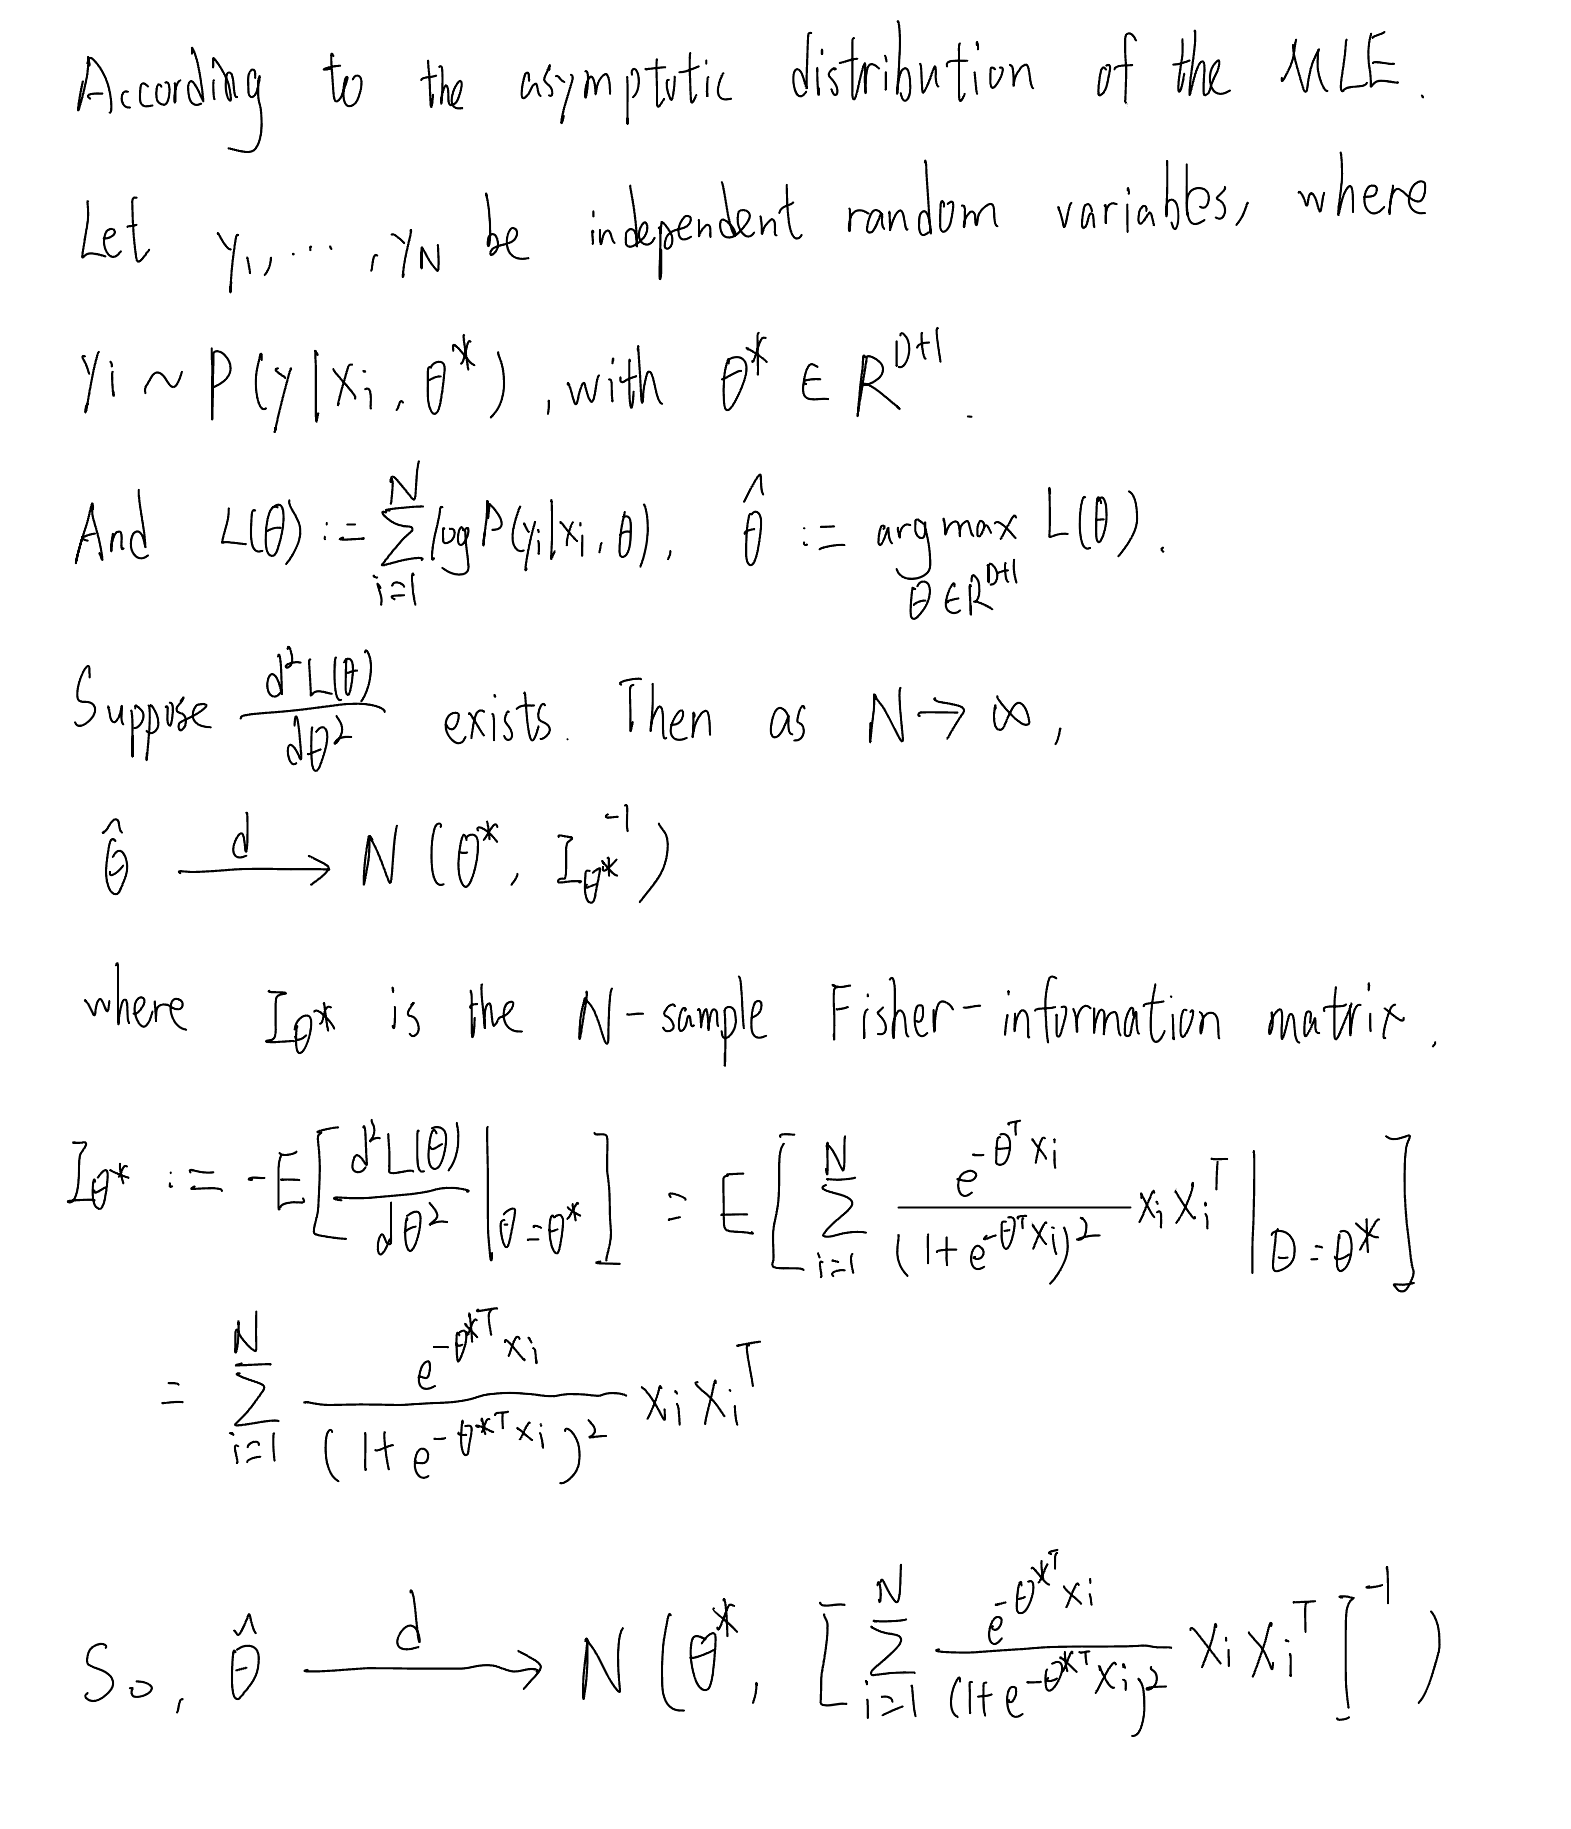

In [5]:
def computeCovarianceOfTheta(X, theta):
    # matrix method
    cov_theta = np.linalg.inv(np.exp(-theta.T @ X) / (1 + np.exp(-theta.T @ X))**2 * X @ X.T)

    # # loop method
    # cov_theta = np.zeros((X.shape[0], X.shape[0]))
    # for i in range(X.shape[1]):
    #     vector = X[:, i].reshape((X.shape[0], 1))
    #     cov_theta += np.exp(-theta.T @ vector) / (1 + np.exp(-theta.T @ vector))**2 * vector @ vector.T
    # cov_theta = np.linalg.inv(cov_theta)

    return cov_theta

cov_theta = computeCovarianceOfTheta(X, theta)
print(cov_theta)

[[ 0.00812249  0.00182274 -0.00098048  0.00087231  0.00078299 -0.00026896
   0.00084946]
 [ 0.00182274  0.01404335 -0.00249332  0.00562319  0.00028844 -0.00077125
   0.00628361]
 [-0.00098048 -0.00249332  0.00894757 -0.00091589 -0.00174592 -0.00197374
  -0.00020596]
 [ 0.00087231  0.00562319 -0.00091589  0.01128295  0.00297261  0.00063755
   0.00054533]
 [ 0.00078299  0.00028844 -0.00174592  0.00297261  0.01399473 -0.00298046
  -0.00149419]
 [-0.00026896 -0.00077125 -0.00197374  0.00063755 -0.00298046  0.00933971
  -0.00207021]
 [ 0.00084946  0.00628361 -0.00020596  0.00054533 -0.00149419 -0.00207021
   0.01184975]]


# Problem 3-2
## (a)
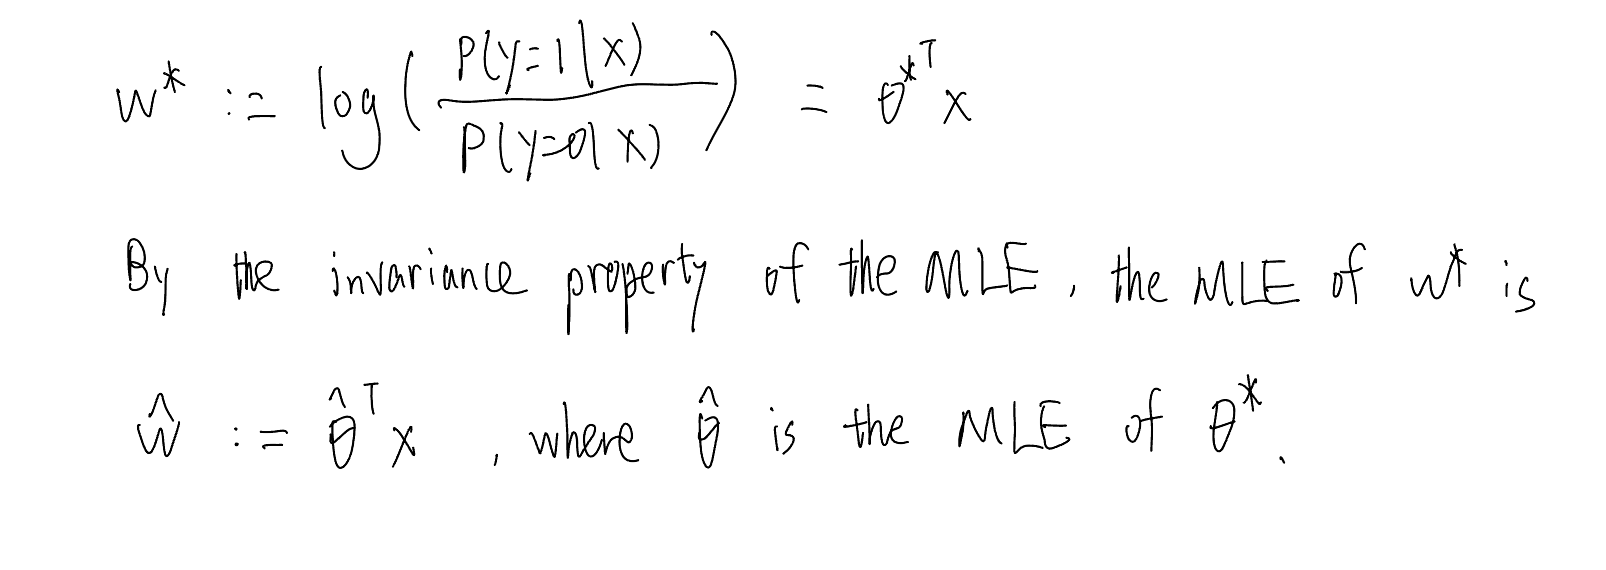

## (b)
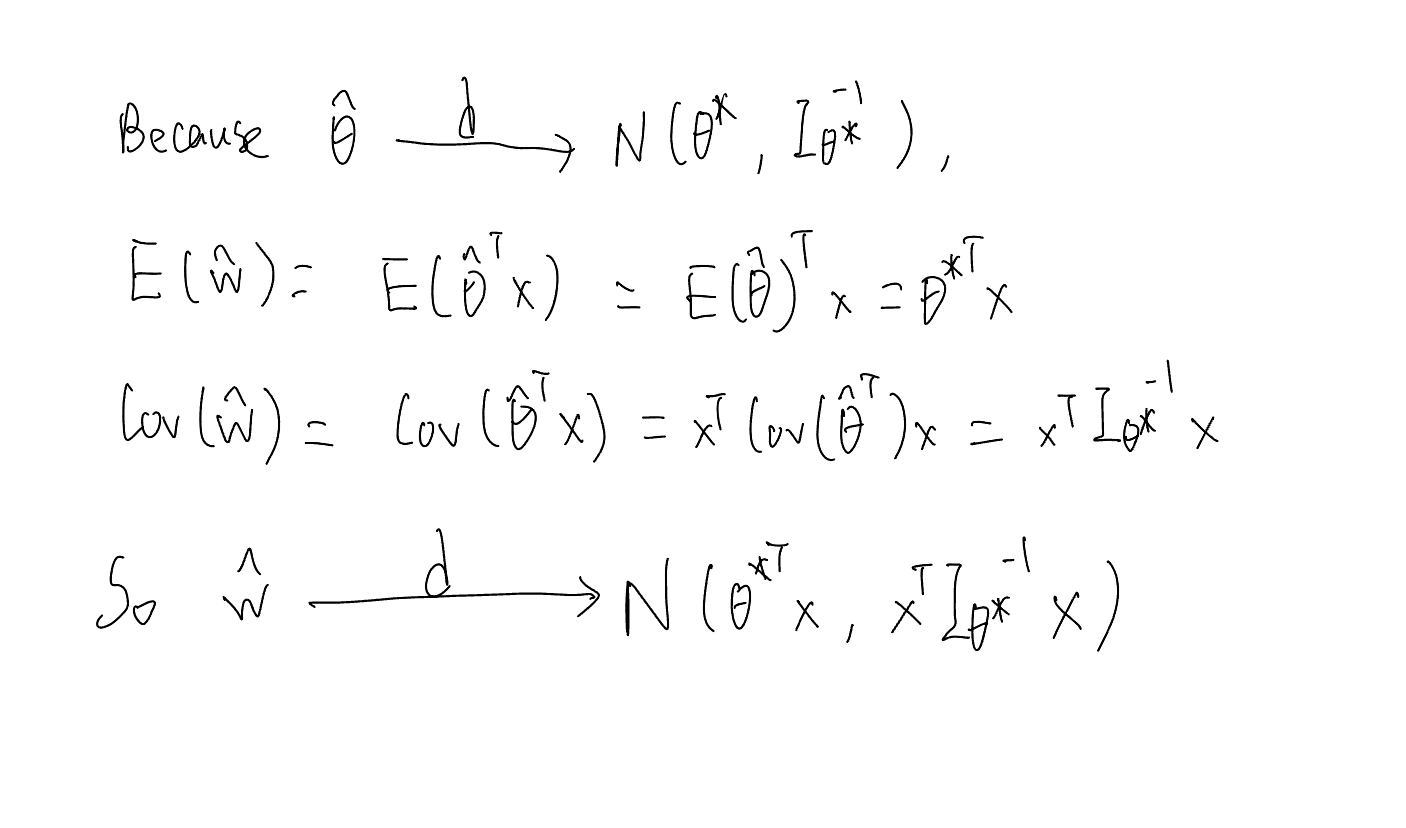

# Problem 3-3
## (a)
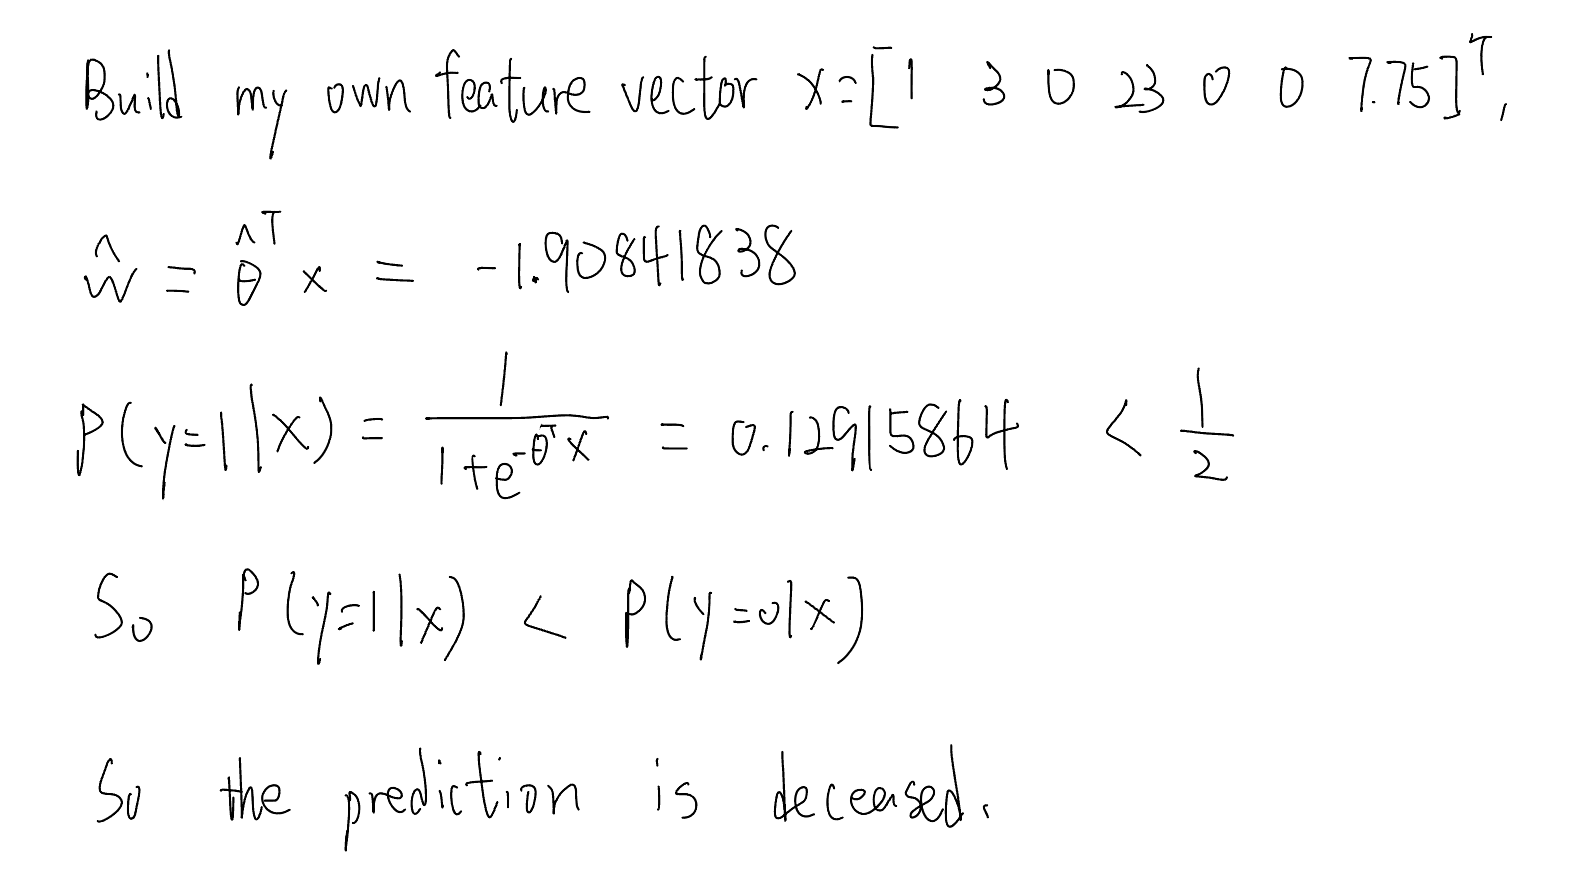

In [6]:
# transform input feature according to standardize_mean and standardize_std
def transformFeature(x, standardize_mean, standardize_std):
    # standardize
    x = (x - standardize_mean) / standardize_std
    # add bias term
    ones_row = np.ones((1, x.shape[1]))
    x = np.vstack((ones_row, x))
    return x

def predict(x, theta):
    # predict
    log_odds = theta.T @ x
    p = logisticFun(log_odds)
    return p, log_odds

# predict
x = np.array([3, 0, 23, 0, 0, 7.75]).reshape((6, 1))
x = transformFeature(x, standardize_mean, standardize_std)
probability, log_odds = predict(x, theta)
print('log odds: ', log_odds)
print('probability: ', probability)

log odds:  [[-1.90841838]]
probability:  [[0.12915864]]


## (b)
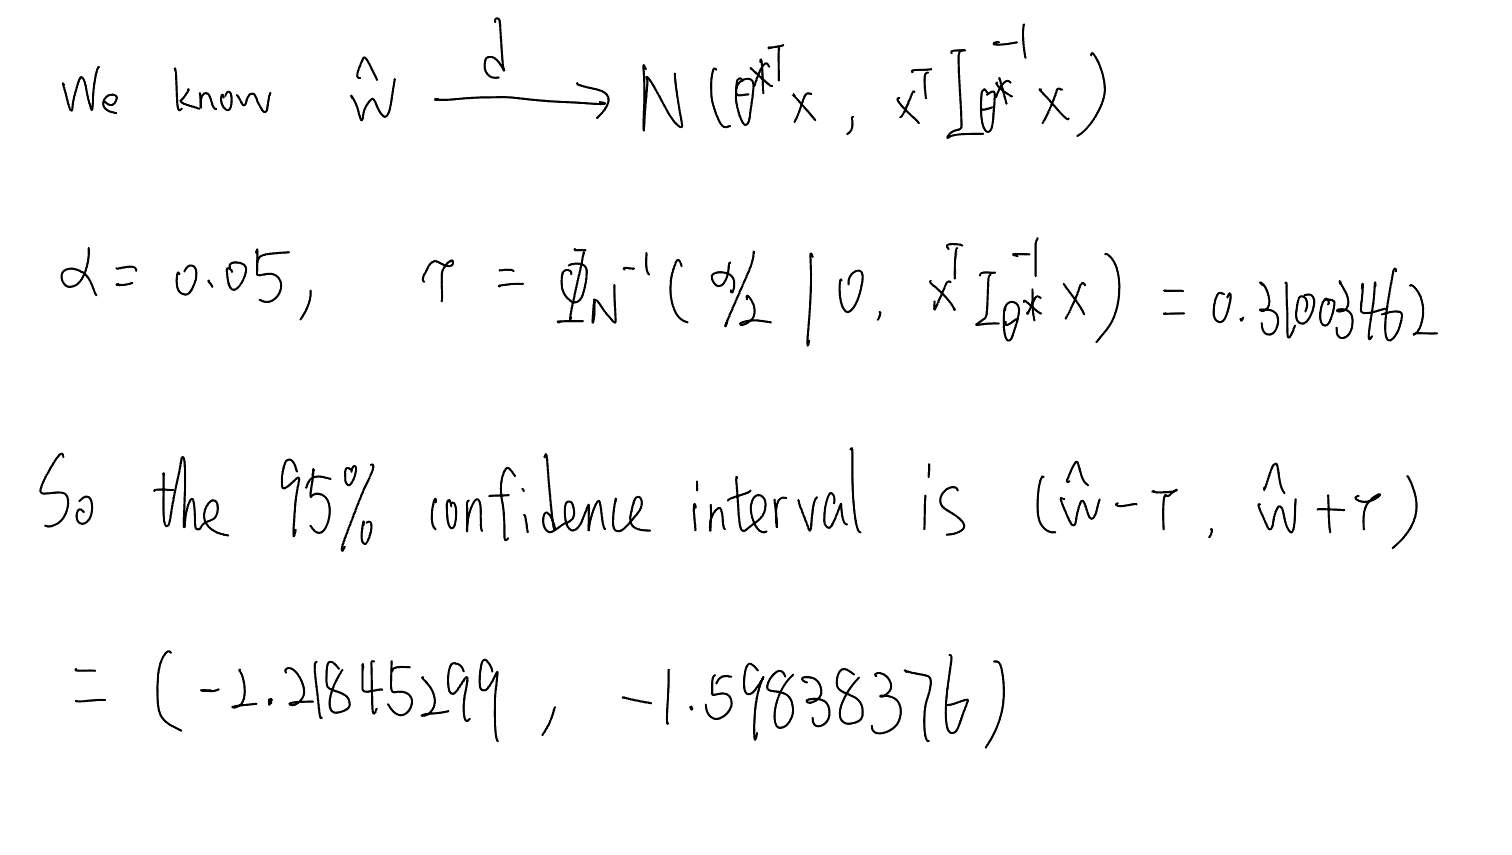

In [7]:
from scipy.stats import norm, chi2

def confidenceIntervalOfLogOdds(x, X, theta):
    # get the covariance of theta
    cov_theta = computeCovarianceOfTheta(X, theta)
    var = x.T @ cov_theta @ x

    alpha = 0.05
    tau = -norm.ppf(alpha/2, scale=np.sqrt(var))
    return tau

# 95% confidence interval
tau = confidenceIntervalOfLogOdds(x, X, theta)
print("tau: ", tau)
print("95% confidence interval of log_odds: ", (log_odds-tau, log_odds+tau))

tau:  [[0.31003462]]
95% confidence interval of log_odds:  (array([[-2.21845299]]), array([[-1.59838376]]))


## (c)
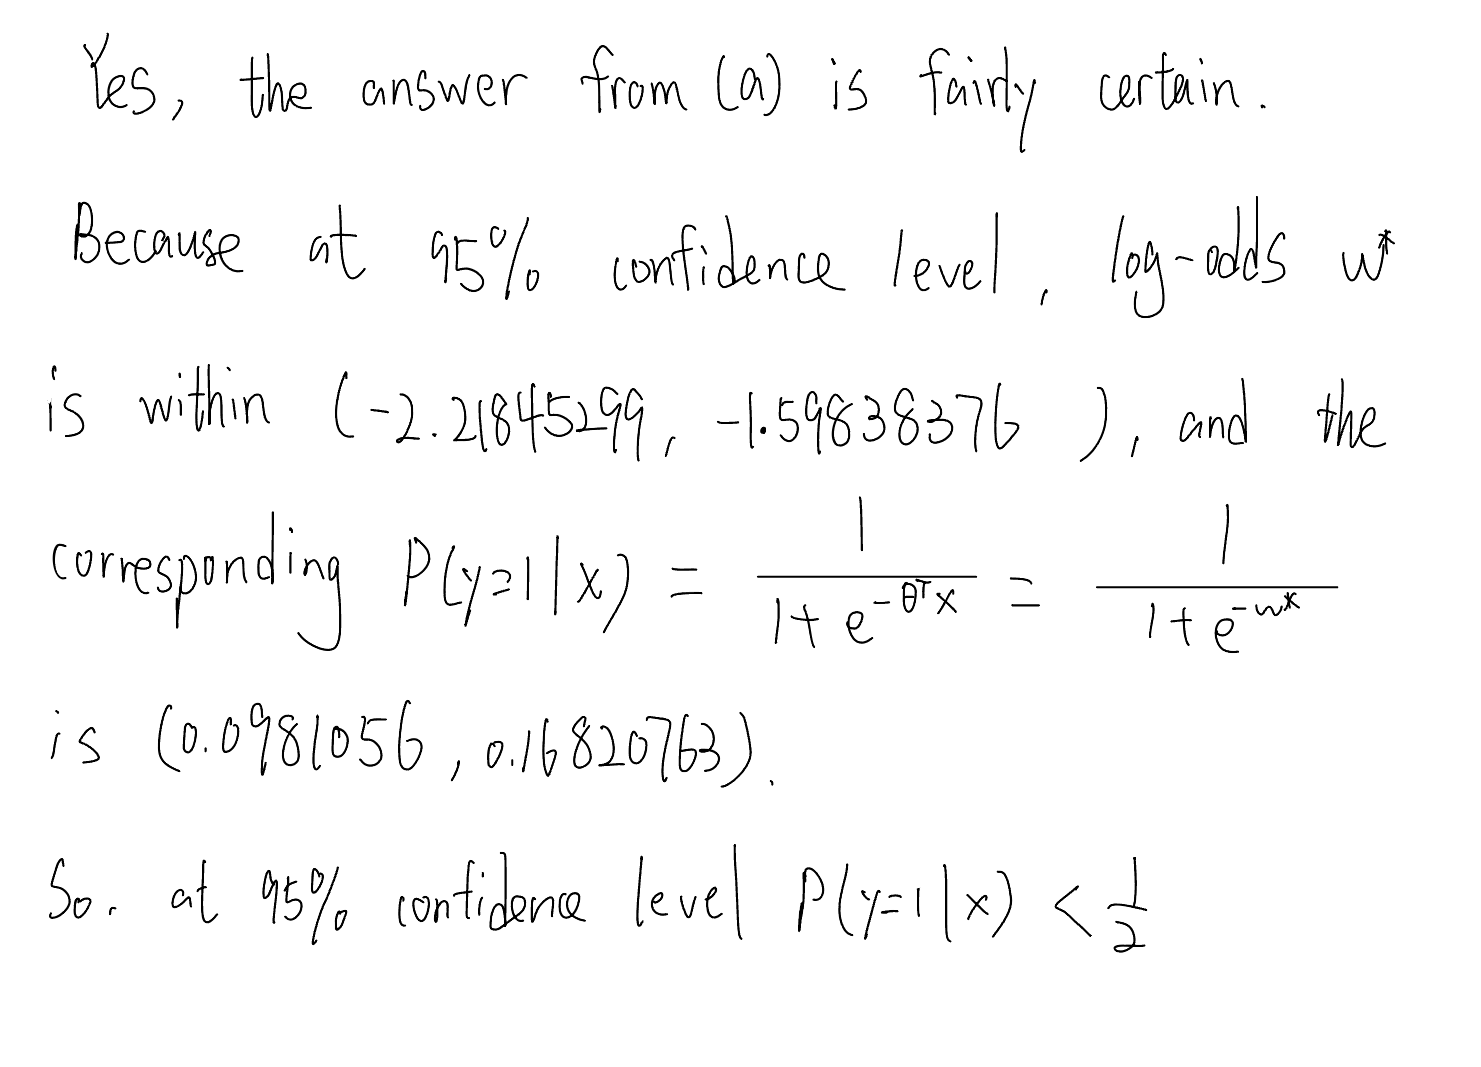

In [8]:
print("95% confidence interval of probability: ", (logisticFun(log_odds-tau), logisticFun(log_odds+tau)))

95% confidence interval of probability:  (array([[0.0981056]]), array([[0.16820763]]))


# Problem 3.4
## (a)
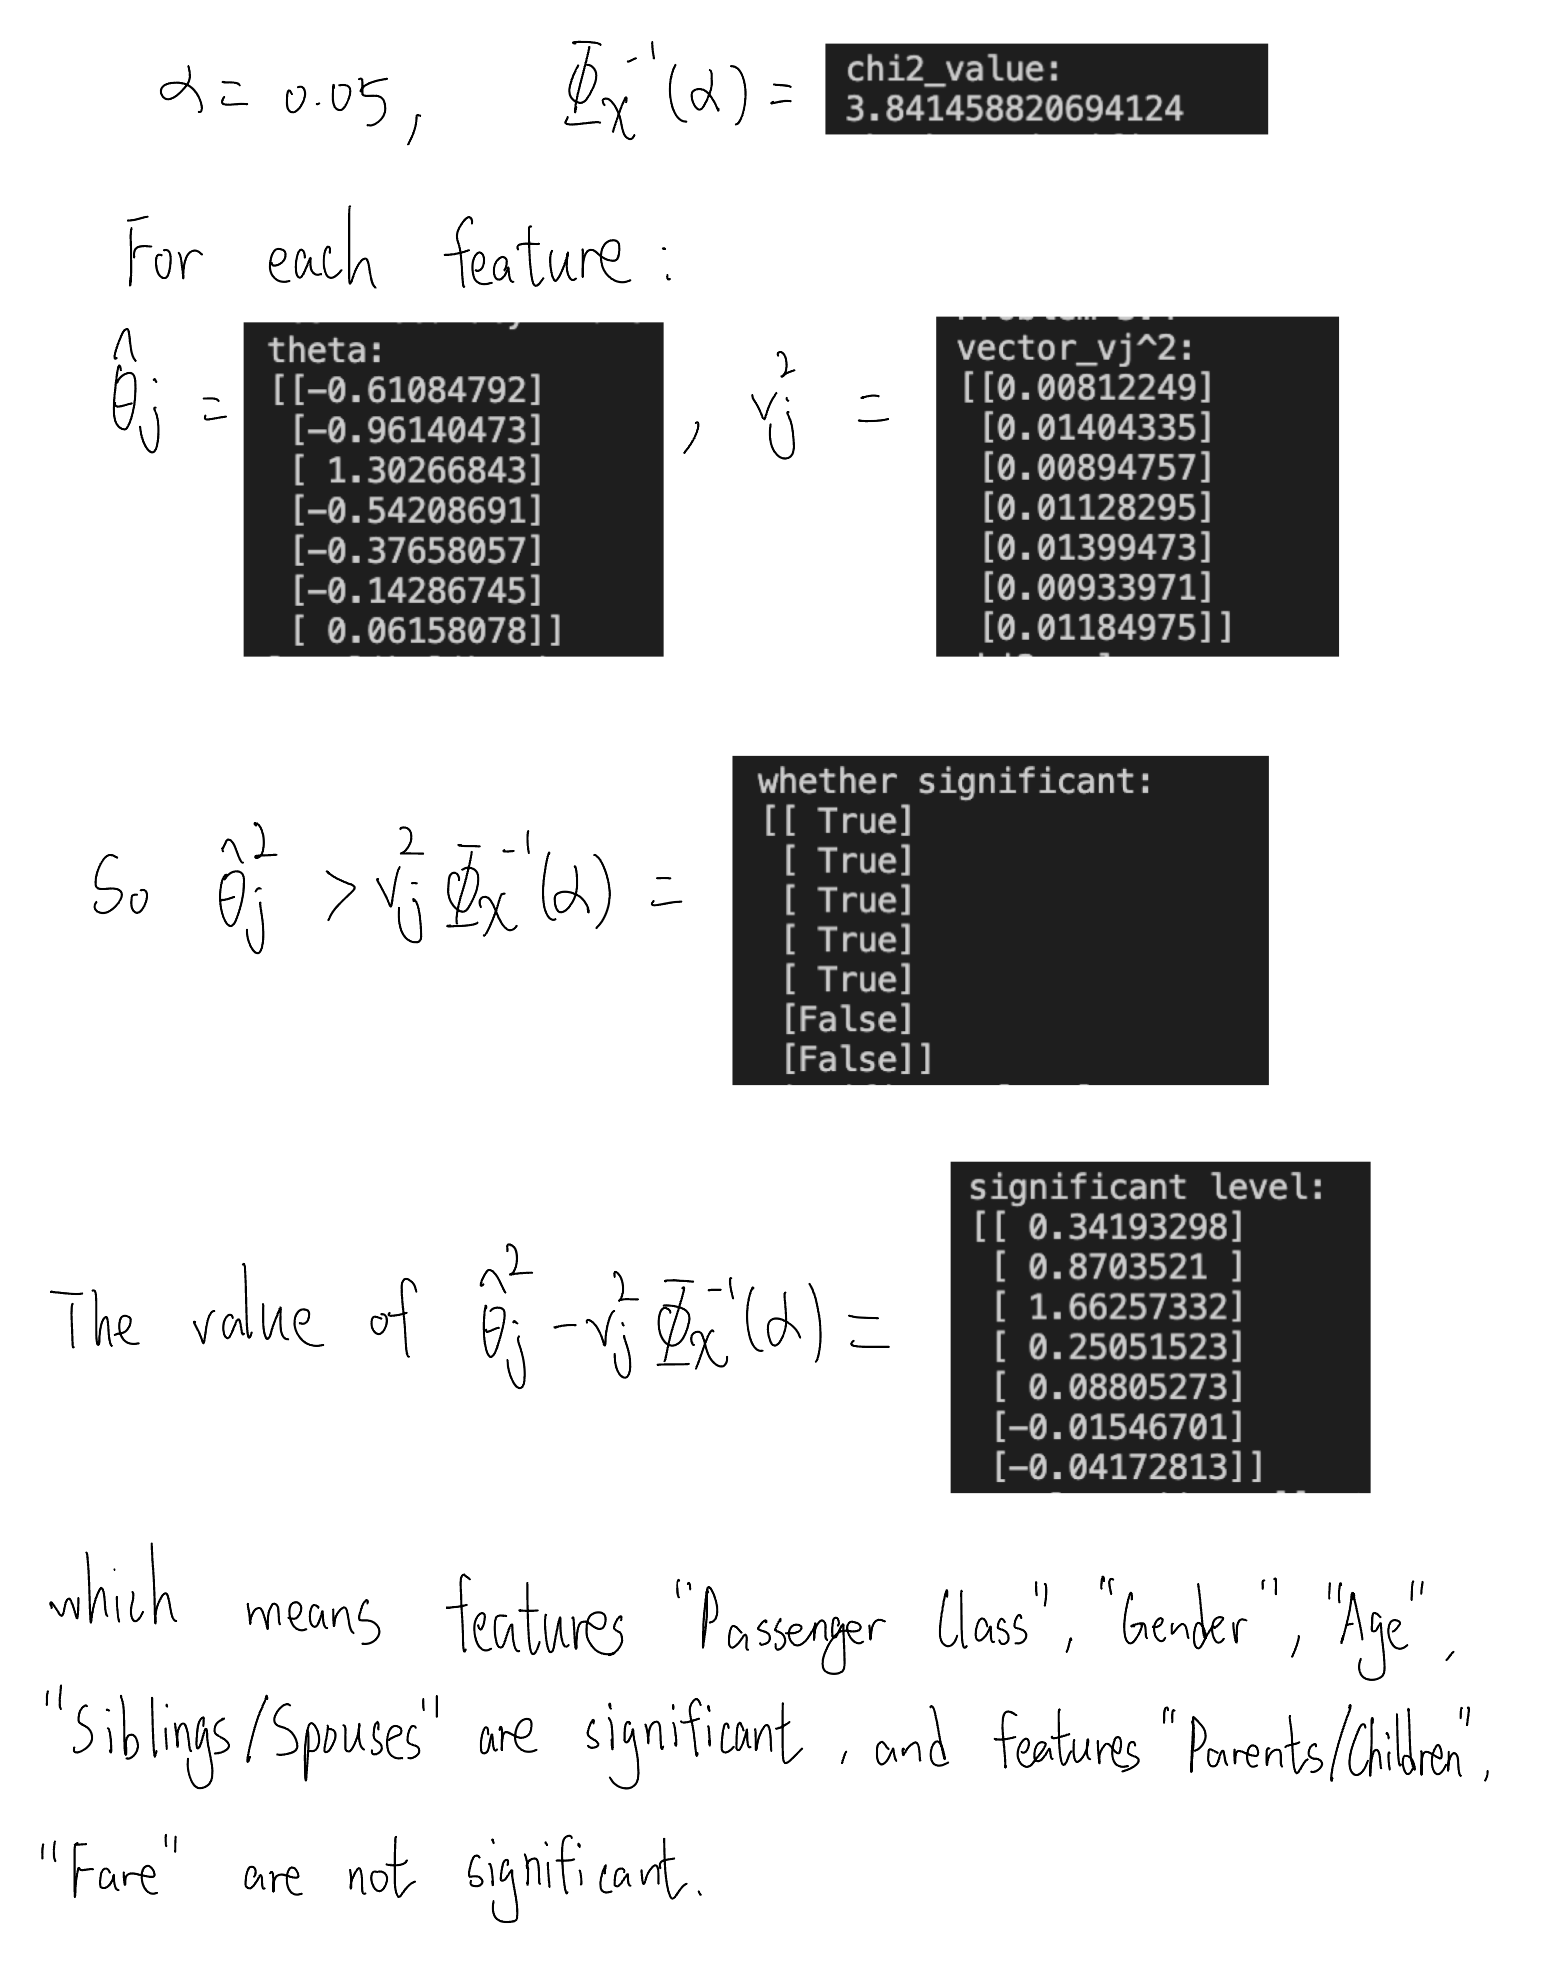

In [9]:
def significanceTest(X, theta):
    cov_theta = computeCovarianceOfTheta(X, theta)
    vector_vj2 = np.diag(cov_theta).reshape((cov_theta.shape[0], 1))

    alpha = 0.05
    chi_value = chi2.ppf(1-alpha, df=1)
    
    return vector_vj2, chi_value

# significant test
vector_vj2, chi_value = significanceTest(X, theta)
print('vector_vj^2:')
print(vector_vj2)
print("chi2_value: ")
print(chi_value)
print("whether significant:")
print(theta**2 > chi_value * vector_vj2)
print("significant level:")
print(theta**2 - chi_value * vector_vj2)

vector_vj^2:
[[0.00812249]
 [0.01404335]
 [0.00894757]
 [0.01128295]
 [0.01399473]
 [0.00933971]
 [0.01184975]]
chi2_value: 
3.841458820694124
whether significant:
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]]
significant level:
[[ 0.34193298]
 [ 0.8703521 ]
 [ 1.66257332]
 [ 0.25051523]
 [ 0.08805273]
 [-0.01546701]
 [-0.04172813]]


## (b)
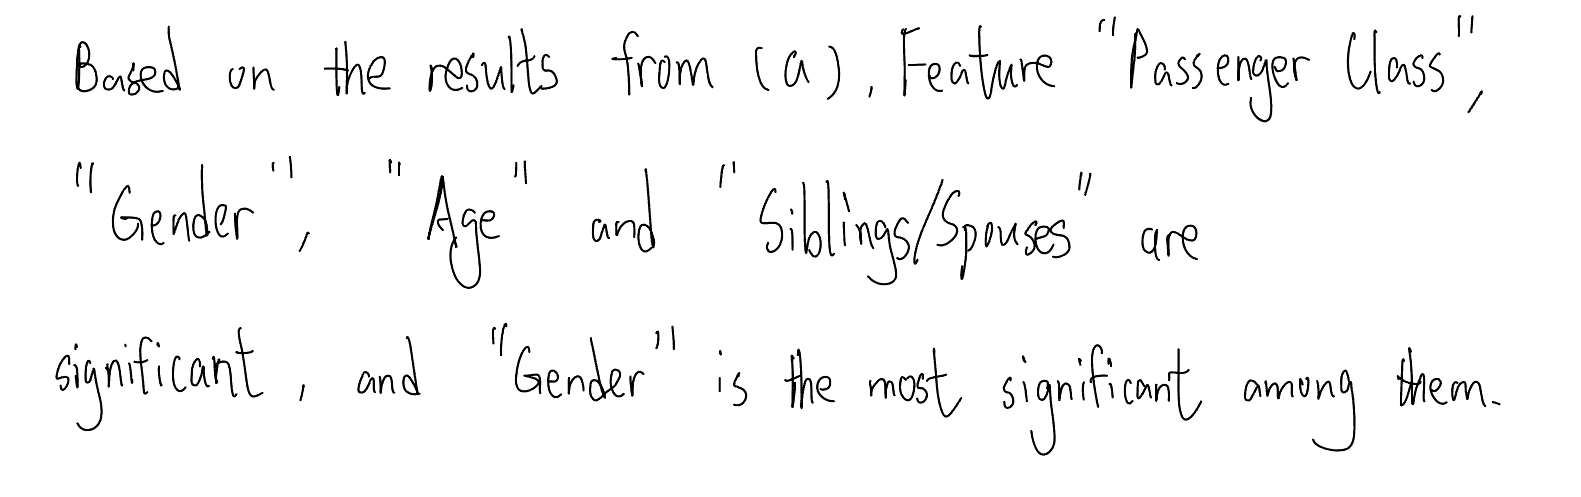

## (c)
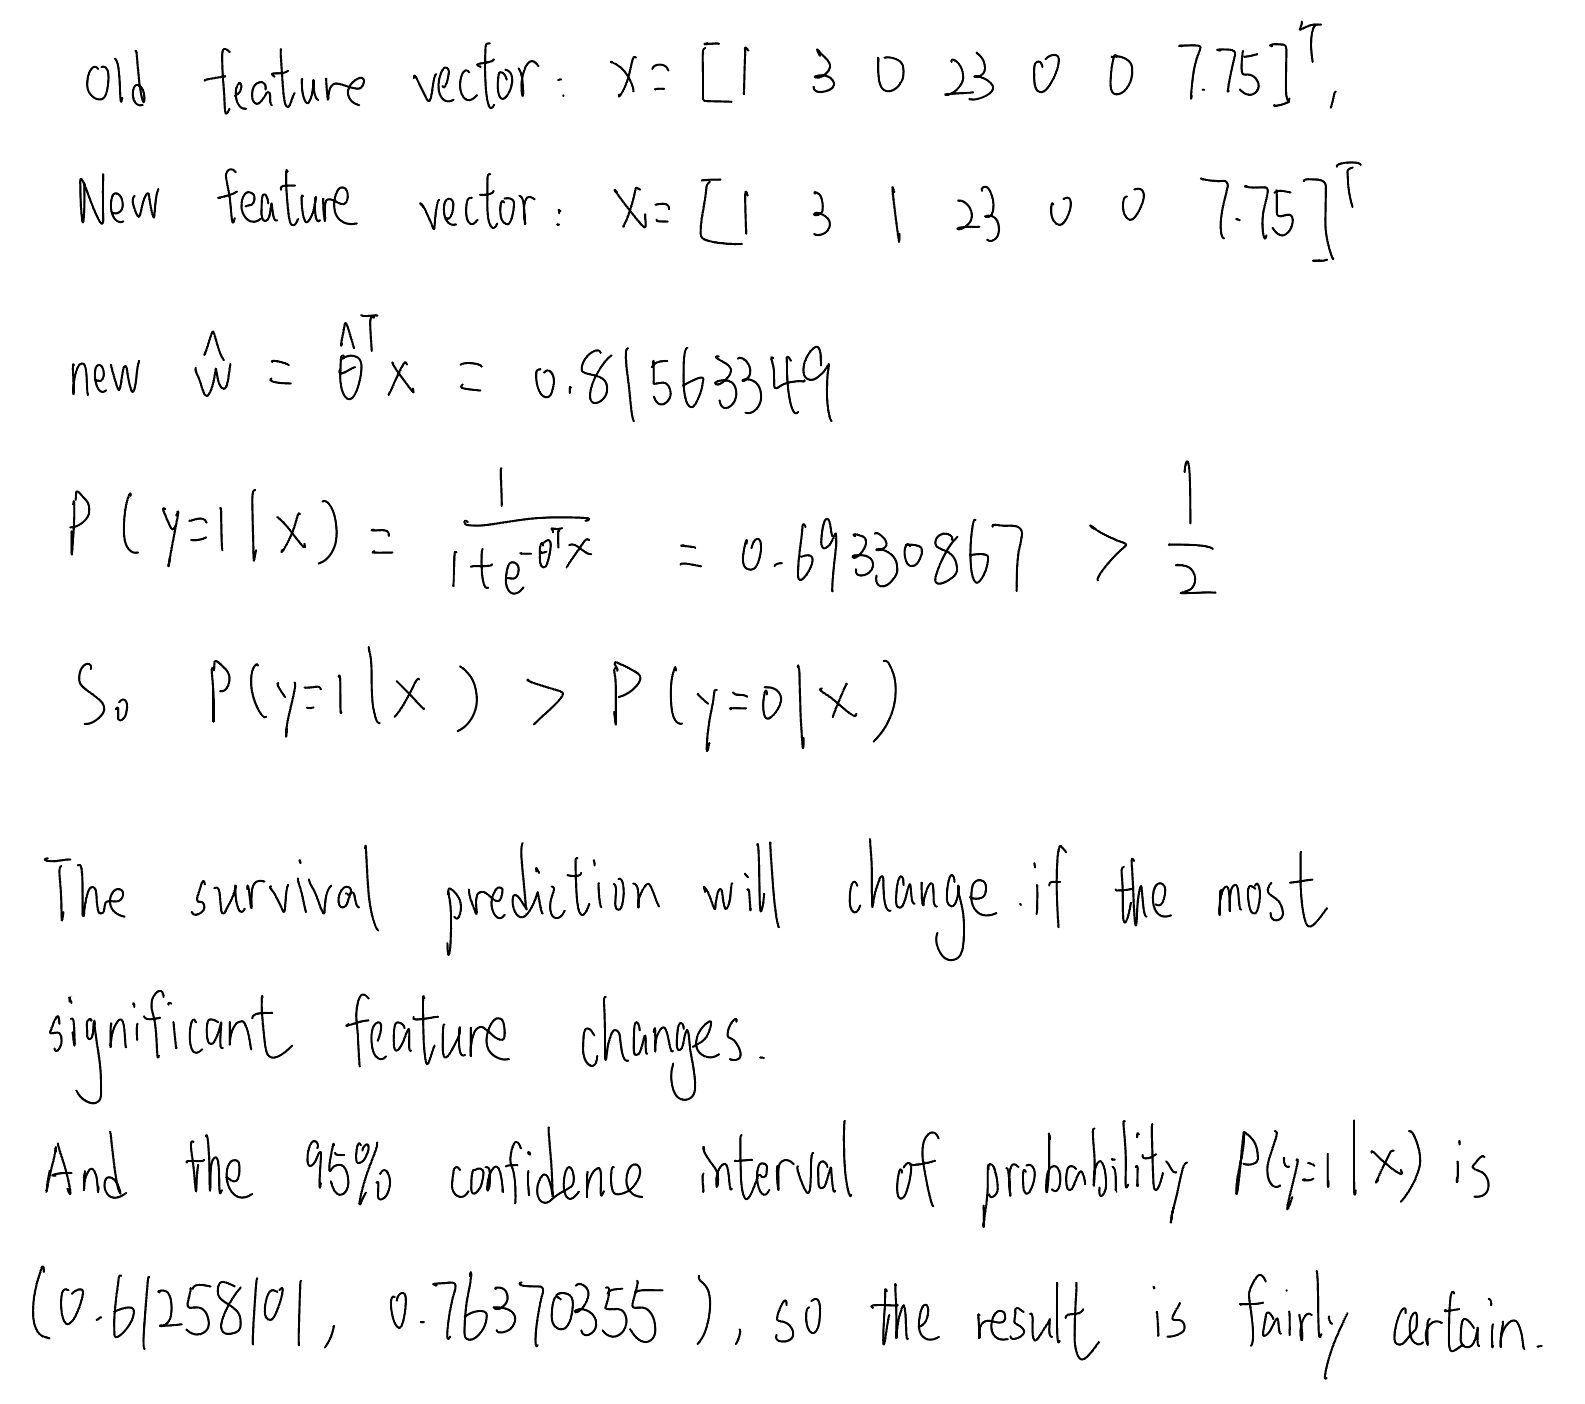

In [10]:
# change the most significant feature and test
new_x = np.array([3, 1, 23, 0, 0, 7.75]).reshape((6, 1))
new_x = transformFeature(new_x, standardize_mean, standardize_std)
new_probability, new_log_odds = predict(new_x, theta)
print('new log odds: ', new_log_odds)
print('new_probability: ', new_probability)

# 95% confidence interval
new_tau = confidenceIntervalOfLogOdds(new_x, X, theta)
print("tau: ", new_tau)
print("95% confidence interval of log_odds: ", (new_log_odds-new_tau, new_log_odds+new_tau))
print("95% confidence interval of probability: ", (logisticFun(new_log_odds-new_tau), logisticFun(new_log_odds+new_tau)))

new log odds:  [[0.81563349]]
new_probability:  [[0.69330867]]
tau:  [[0.35745906]]
95% confidence interval of log_odds:  (array([[0.45817443]]), array([[1.17309255]]))
95% confidence interval of probability:  (array([[0.61258101]]), array([[0.76370355]]))


# Appendix

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2

# logistic function
def logisticFun(x):
    x[x < -500] = -500
    return 1 / (1 + np.exp(-x))

def transformFeature(x, standardize_mean, standardize_std):
    # standardize
    x = (x - standardize_mean) / standardize_std
    # add bias term
    ones_row = np.ones((1, x.shape[1]))
    x = np.vstack((ones_row, x))
    return x

def loadDataSet():
    # read data from file
    df = pd.read_csv('titanic_data.csv')
    # split features and label
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    # transform to numpy
    X = X.to_numpy().T
    y = y.to_numpy().reshape((y.shape[0], 1))
    # standardize
    standardize_mean = np.mean(X, axis=1, keepdims=True)
    standardize_std = np.std(X, axis=1, keepdims=True)
    X = (X - standardize_mean) / standardize_std 
    # add bias term
    ones_row = np.ones((1, X.shape[1]))
    X = np.vstack((ones_row, X))
    # split train and test
    sample_number = X.shape[1]
    train_number = int(sample_number * 0.8)
    X_test = X[:, train_number:]
    X_train = X[:, :train_number]
    y_test = y[train_number:]
    y_train = y[:train_number]
    return X, X_train, X_test, y, y_train, y_test, standardize_mean, standardize_std

def computeGradient(X, y, theta):
    # compute gradient
    gradient = X @ (y.T - logisticFun(theta.T @ X)).T
    return gradient

def learningTheta(X_train, X_test, y_train, y_test):
    theta = np.ones(X_train.shape[0]).reshape((X_train.shape[0],1))
    # learning rate
    step = 0.1
    # learning rate's decay rate
    decay_rate = 0.0001
    # convergence condition
    epsilon = 0.0001
    # max iterations
    max_iterations = 10000
    for i in range(max_iterations):
        # print('Iteration', i)
        gradient = computeGradient(X_train, y_train, theta)
        theta = theta + step * gradient
        # print('gradient: ', gradient)
        # print('theta: ', theta)
        if np.linalg.norm(gradient) < epsilon:
            print('Model converge at iteration', i)
            test_result = logisticFun(theta.T @ X_test).reshape((y_test.shape[0], 1))
            test_result[test_result > 0.5] = 1
            test_result[test_result <= 0.5] = 0
            test_accuracy = np.sum(test_result == y_test) / y_test.shape[0]
            print("Test Accuracy: ", test_accuracy)
            break

        step = step / (1 + decay_rate * i)
    
    return theta

def computeLogLikelihood(X, y, theta):
    log_likelihood =  np.log(logisticFun(theta.T @ X)) @ y + np.log(logisticFun(-theta.T @ X)) @ (1 - y)
    return log_likelihood

def predict(x, theta):
    # predict
    log_odds = theta.T @ x
    p = logisticFun(log_odds)
    return p, log_odds

def computeCovarianceOfTheta(X, theta):
    # matrix method
    cov_theta = np.linalg.inv(np.exp(-theta.T @ X) / (1 + np.exp(-theta.T @ X))**2 * X @ X.T)

    # loop method
    # cov_theta = np.zeros((X.shape[0], X.shape[0]))
    # for i in range(X.shape[1]):
    #     vector = X[:, i].reshape((X.shape[0], 1))
    #     cov_theta += np.exp(-theta.T @ vector) / (1 + np.exp(-theta.T @ vector))**2 * vector @ vector.T
    # cov_theta = np.linalg.inv(cov_theta)

    return cov_theta

def confidenceIntervalOfLogOdds(x, X, theta):
    # get the covariance of theta
    cov_theta = computeCovarianceOfTheta(X, theta)
    var = x.T @ cov_theta @ x

    alpha = 0.05
    tau = -norm.ppf(alpha/2, scale=np.sqrt(var))
    return tau

def significanceTest(X, theta):
    cov_theta = computeCovarianceOfTheta(X, theta)
    vector_vj2 = np.diag(cov_theta).reshape((cov_theta.shape[0], 1))

    alpha = 0.05
    chi_value = chi2.ppf(1-alpha, df=1)
    
    return vector_vj2, chi_value

def run():
    # load data
    print("\nProblem 3.1")
    X, X_train, X_test, y, y_train, y_test, standardize_mean, standardize_std = loadDataSet()

    # learning theta
    theta = learningTheta(X_train, X_test, y_train, y_test)
    print('theta: ')
    print(theta)

    # compute log likelihood
    log_likelihood = computeLogLikelihood(X, y, theta)
    print('log_likelihood:\n', log_likelihood)

    # predict
    print("\nProblem 3.3")
    x = np.array([3, 0, 23, 0, 0, 7.75]).reshape((6, 1))
    x = transformFeature(x, standardize_mean, standardize_std)
    probability, log_odds = predict(x, theta)
    print('log odds: ', log_odds)
    print('probability: ', probability)

    # 95% confidence interval
    tau = confidenceIntervalOfLogOdds(x, X, theta)
    print("tau: ", tau)
    print("95% confidence interval of tau: ", (log_odds-tau, log_odds+tau))
    print("95% confidence interval of probability: ", (logisticFun(log_odds-tau), logisticFun(log_odds+tau)))

    # significance test
    print("\nProblem 3.4")
    vector_vj2, chi_value = significanceTest(X, theta)
    print('vector_vj^2:')
    print(vector_vj2)
    print("chi2_value: ")
    print(chi_value)
    print("whether significant:")
    print(theta**2 > chi_value * vector_vj2)
    print("significant level:")
    print(theta**2 - chi_value * vector_vj2)

    # change the most significant feature and test
    new_x = np.array([3, 1, 23, 0, 0, 7.75]).reshape((6, 1))
    new_x = transformFeature(new_x, standardize_mean, standardize_std)
    new_probability, new_log_odds = predict(new_x, theta)
    print('new log odds: ', new_log_odds)
    print('new_probability: ', new_probability)

    # 95% confidence interval
    tau = confidenceIntervalOfLogOdds(new_x, X, theta)
    print("tau: ", tau)
    print("95% confidence interval of log_odds: ", (new_log_odds-tau, new_log_odds+tau))
    print("95% confidence interval of probability: ", (logisticFun(new_log_odds-tau), logisticFun(new_log_odds+tau)))

if __name__ == '__main__':
    run()


Problem 3.1
Model converge at iteration 264
Test Accuracy:  0.8202247191011236
theta: 
[[-0.61084792]
 [-0.96140473]
 [ 1.30266843]
 [-0.54208691]
 [-0.37658057]
 [-0.14286745]
 [ 0.06158078]]
log_likelihood:
 [[-391.33756988]]

Problem 3.3
log odds:  [[-1.90841838]]
probability:  [[0.12915864]]
tau:  [[0.31003462]]
95% confidence interval of tau:  (array([[-2.21845299]]), array([[-1.59838376]]))
95% confidence interval of probability:  (array([[0.0981056]]), array([[0.16820763]]))

Problem 3.4
vector_vj^2:
[[0.00812249]
 [0.01404335]
 [0.00894757]
 [0.01128295]
 [0.01399473]
 [0.00933971]
 [0.01184975]]
chi2_value: 
3.841458820694124
whether significant:
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]]
significant level:
[[ 0.34193298]
 [ 0.8703521 ]
 [ 1.66257332]
 [ 0.25051523]
 [ 0.08805273]
 [-0.01546701]
 [-0.04172813]]
new log odds:  [[0.81563349]]
new_probability:  [[0.69330867]]
tau:  [[0.35745906]]
95% confidence interval of log_odds:  (array([[0.45817443]]), 